In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter as coco
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

cc=coco.CountryConverter()

In [3]:
econ2=pd.read_csv('datasets\\Global Economy Indicators.csv')#,sep='|',encoding='cp1252'
col22=[]

# cleaning the names of the columns
for c in econ2.columns:
    col22.append(c.strip())
econ2.columns=col22
# cleaning the countries
for i, c in econ2['Country'].items():
    econ2.iloc[i,1]=c.strip()

In [4]:
# convert every name of country in standartized names with library cc
econ2['Country'][econ2['Country']=='D.R. of the Congo']='Democratic Republic of the Congo'
econ2['Country']=cc.pandas_convert(series=econ2['Country'],to='name_short',not_found=None)
econ2['CountryID']=cc.pandas_convert(series=econ2['Country'],to='ISO3',not_found=None)

C:\Users\gripin\AppData\Local\Temp\ipykernel_32220\4166539361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ2['Country'][econ2['Country']=='D.R. of the Congo']='Democratic Republic of the Congo'
Former Netherlands Antilles not found in regex
USSR (Former) not found in regex
Zanzibar not found in regex
Yugoslavia (Former) not found in regex
Former Netherlands Antilles not found in regex
USSR (Former) not found in regex
Zanzibar not found in regex
Yugoslavia (Former) not found in regex


In [5]:
#slight corrections of the countries that are not covered by cc
econ2['CountryID'][econ2['Country']=='USSR (Former)']='SUN'
econ2['CountryID'][econ2['Country']=='Yugoslavia (Former)']='YUG'
econ2['CountryID'][econ2['Country']=='Zanzibar']='EAZ'
econ2['CountryID'][econ2['Country']=='Former Netherlands Antilles']='ANT'

C:\Users\gripin\AppData\Local\Temp\ipykernel_32220\3935149268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ2['CountryID'][econ2['Country']=='USSR (Former)']='SUN'
C:\Users\gripin\AppData\Local\Temp\ipykernel_32220\3935149268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ2['CountryID'][econ2['Country']=='Yugoslavia (Former)']='YUG'
C:\Users\gripin\AppData\Local\Temp\ipykernel_32220\3935149268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [6]:
sectors=['Agriculture, hunting, forestry, fishing (ISIC A-B)',
 'Construction (ISIC F)',
 'Exports of goods and services',
 'Final consumption expenditure',
 'General government final consumption expenditure',
 'Gross capital formation',
 'Gross fixed capital formation (including Acquisitions less disposals of valuables)',
 'Household consumption expenditure (including Non-profit institutions serving households)',
 'Imports of goods and services',
 'Manufacturing (ISIC D)',
 'Mining, Manufacturing, Utilities (ISIC C-E)',
 'Other Activities (ISIC J-P)',
 'Transport, storage and communication (ISIC I)',
 'Wholesale, retail trade, restaurants and hotels (ISIC G-H)',
 'Total Value Added']

In [7]:
econ2

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,AFG,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,AFG,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,AFG,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,AFG,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,AFG,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,ZMB,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,ZMB,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,ZMB,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,ZMB,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


In [8]:
i=0
for row in econ2[sectors].to_numpy():
    econ2.loc[i,sectors]=list(row/row[-1]*100)
    i+=1


In [31]:
econ2['Population'].isnull().sum()

0

In [11]:
infl=pd.read_csv('datasets\\inflation.csv',sep=',')

In [12]:
infl.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [16]:
infl=infl.rename(columns={'Country Code':'CountryID'})
infl

,Country Name,CountryID,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.370290,5.245878,6.571396,6.399343,4.720805,4.653665,5.405162,7.240978,10.773751,7.126975
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.768436,2.130817,1.487416,1.725486,1.784050,1.983092,2.490378,3.745700,7.949251,4.953050
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7.280387,9.355972,30.694415,29.844480,19.628938,17.080954,22.271539,25.754295,21.355290,13.644102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.428958,-0.536929,0.273169,1.488234,1.053798,2.675992,0.198228,3.353691,11.580510,4.944324
262,"Yemen, Rep.",YEM,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.104726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.288859,2.102374,1.246285,1.33797,2.534973,4.069029,...,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672,7.039727,6.073909
264,Zambia,ZMB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7.806876,10.110593,17.869730,6.577312,7.494572,9.150316,15.733060,22.020768,10.993204,10.884532


In [17]:
# to fit the other set of data, we remove the 60 decade as well as everything after 21
infla=infl.drop(columns=['Country Name','Indicator Name','Indicator Code','1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','2022','2023'])

In [18]:
inf=infla.T

In [19]:
inf.columns=inf.loc['CountryID',:]

In [60]:
inf

CountryID,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
CountryID,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.742409,NaN,NaN,4.991877,NaN,NaN
1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.766444,NaN,NaN,5.957398,NaN,NaN
1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.506824,NaN,NaN,6.425708,NaN,NaN
1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.266667,NaN,NaN,...,NaN,NaN,NaN,NaN,11.764243,NaN,NaN,9.433987,NaN,NaN
1974,NaN,19.598394,NaN,NaN,NaN,NaN,NaN,15.528282,NaN,NaN,...,NaN,NaN,NaN,NaN,24.987679,NaN,NaN,11.724126,NaN,NaN
1975,NaN,15.224099,NaN,NaN,NaN,NaN,NaN,9.669695,NaN,NaN,...,NaN,NaN,NaN,NaN,8.787742,NaN,NaN,13.425942,NaN,NaN
1976,NaN,11.216471,NaN,NaN,NaN,NaN,NaN,10.317416,NaN,NaN,...,NaN,NaN,NaN,NaN,4.903687,NaN,NaN,11.020391,NaN,NaN
1977,NaN,14.238055,NaN,NaN,NaN,NaN,NaN,11.989283,NaN,NaN,...,NaN,NaN,5.736509,NaN,14.61079,NaN,NaN,11.151964,NaN,NaN
1978,NaN,12.526893,NaN,NaN,NaN,NaN,NaN,9.716033,NaN,NaN,...,NaN,NaN,6.413793,NaN,2.058659,NaN,NaN,11.135608,NaN,NaN


In [20]:
inf1=inf.drop('CountryID')

In [21]:
inflacol=inf1.columns
inflacol

Index(['ABW', 'AFE', 'AFG', 'AFW', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG',
       ...
       'VIR', 'VNM', 'VUT', 'WLD', 'WSM', 'XKX', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', name='CountryID', length=266)

In [22]:
inf2=inf1.rename_axis('Year').reset_index()

In [23]:
inf3=inf2.melt(id_vars=['Year'], value_vars=inflacol)

In [24]:
col1=list(inf3.columns)
col1[-1]='Inflation'
inf3.columns=col1

In [68]:
inf3  ###

,Year,CountryID,Inflation
0,1970,ABW,NaN
1,1971,ABW,NaN
2,1972,ABW,NaN
3,1973,ABW,NaN
4,1974,ABW,NaN
...,...,...,...
13827,2017,ZWE,0.893962
13828,2018,ZWE,10.618866
13829,2019,ZWE,255.304991
13830,2020,ZWE,557.201817


In [25]:
inf3['Year']=inf3['Year'].astype('int32')

In [26]:
new_df = pd.merge(
    left=econ2, 
    right=inf3,
    how='inner',
    left_on=['CountryID', 'Year'],
    right_on=['CountryID', 'Year'],
)

In [27]:
new_df=new_df.drop(columns='Total Value Added')

In [28]:
new_df.to_csv('datasets\fact_inf.csv')

<Axes: >

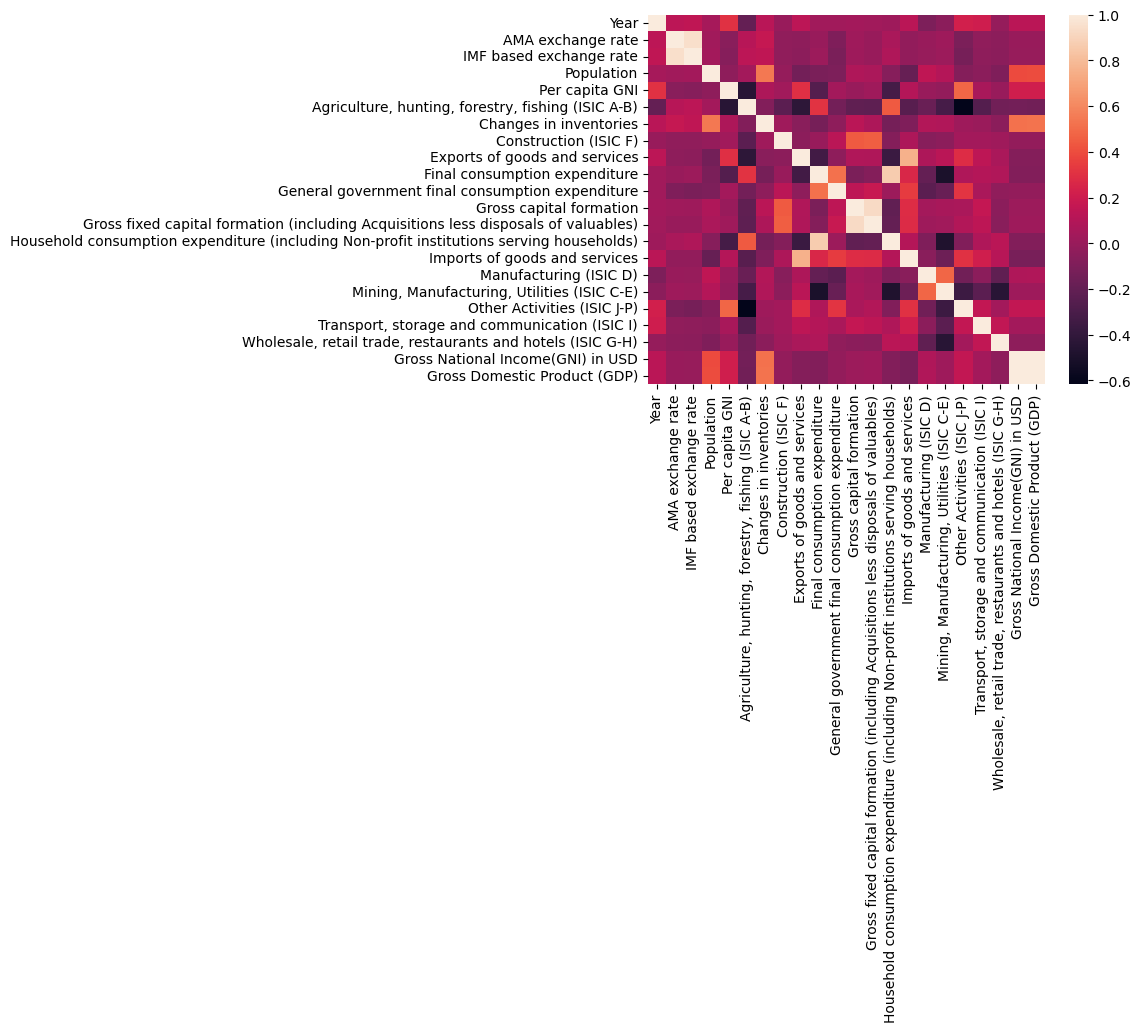

In [29]:
corr = new_df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

